In [14]:
import tensorflow as tf
from tensorflow import keras
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import livelossplot  # Loss function 
from livelossplot import PlotLossesKerasTF # 


In [15]:
# Set the training path and validation path

train_path = '../data/processed/data_Lung_Infection/train/'
validation_path = '../data/processed/data_Lung_Infection/test/'

In [24]:
os.listdir(train_path)

['Type 1 disease', '.DS_Store', 'Healthy', 'Type 2 disease']

## Image Vidualization

In [3]:
print("Training set:\n------------")

num_Healthy = len(os.listdir(os.path.join(train_path, 'Healthy')))
num_Type1 = len(os.listdir(os.path.join(train_path, 'Type 1 disease')))
num_Type2 = len(os.listdir(os.path.join(train_path, 'Type 2 disease')))
print(f"Healthy= {num_Healthy}")
print(f"num_Type1= {num_Type1}")
print(f"num_Type2= {num_Type2}")

print("\n")

print("Validation set:\n------------")

num_Healthy = len(os.listdir(os.path.join(validation_path, 'Healthy')))
num_Type1 = len(os.listdir(os.path.join(validation_path, 'Type 1 disease')))
num_Type2 = len(os.listdir(os.path.join(validation_path, 'Type 2 disease')))
print(f"Healthy= {num_Healthy}")
print(f"num_Type1= {num_Type1}")
print(f"num_Type2= {num_Type2}")


Training set:
------------
Healthy= 70
num_Type1= 102
num_Type2= 70


Validation set:
------------
Healthy= 20
num_Type1= 23
num_Type2= 20


Healthy


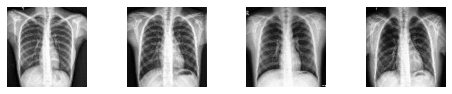

In [66]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Healthy/**')
print("Healthy")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(1,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1


Type 1 disease


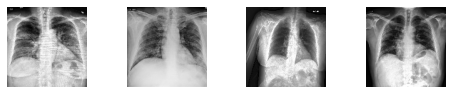

In [61]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Type 1 disease/**')
print("Type 1 disease")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(2,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1

Type 2 disease


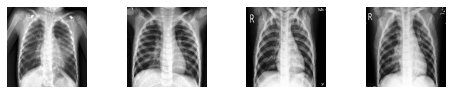

In [62]:
multipleImages = glob('../data/processed/data_Lung_Infection/train/Type 2 disease/**')
print("Type 2 disease")
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for l in multipleImages[:4]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(2,5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); 
    plt.axis('off')
    i_ += 1

## Distribution of Image across the class

## CNN Architecture 1

In [16]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [17]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory(train_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData = test_generator.flow_from_directory(validation_path,
                                                     batch_size=32, #how many images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 242 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [6]:
print(trainImageData.image_shape)
print(testImageData.image_shape)

(48, 48, 3)
(48, 48, 3)


In [7]:
trainImageData.class_indices


{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [20]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 
model.add(tf.keras.layers.Dropout(.2,noise_shape=None, seed=None))#Dropout


#Third Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None

)) #BathNormalization

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 1 , activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 16)       64        
 ormalization)                                        

In [22]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

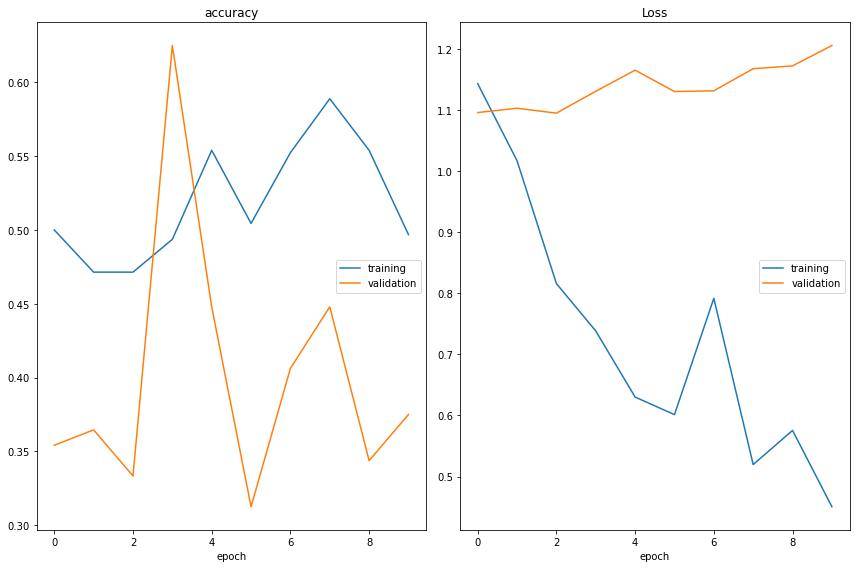

accuracy
	training         	 (min:    0.471, max:    0.589, cur:    0.497)
	validation       	 (min:    0.312, max:    0.625, cur:    0.375)
Loss
	training         	 (min:    0.451, max:    1.143, cur:    0.451)
	validation       	 (min:    1.095, max:    1.205, cur:    1.205)
7/7 [==============================] - 5s 701ms/step - loss: 0.4507 - accuracy: 0.4968 - val_loss: 1.2053 - val_accuracy: 0.3750


In [24]:
# Fit the model
model.fit(trainImageData,
          validation_data=testImageData,
          epochs=10,
          callbacks=[PlotLossesKerasTF()],
          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size,
          validation_steps= len(testImageData.filenames) // testImageData.batch_size)

## CNN Architecture 2